<a href="https://colab.research.google.com/github/jwdagney55/DSPS_JDagney/blob/main/HW7/HW7_Dagney.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import pylab as pl
import sklearn as skl
from sklearn import cluster
%pylab inline

Populating the interactive namespace from numpy and matplotlib


read the data in https://github.com/fedhere/DSPS/tree/master/HW10

In [8]:
genes = pd.read_csv("https://raw.githubusercontent.com/fedhere/DSPS_FBianco/master/HW7/kidpackgenes.csv")
genes.drop("Unnamed: 0", axis=1, inplace=True)
genes = genes.iloc[:-1,:]

In [9]:
genes

,1,2,3,4,5,6,7,8,10,11,...,76,77,78,79,81,83,84,85,86,87
0,-0.146342,-0.520637,0.175828,-0.323736,0.172691,0.025156,0.024812,0.172268,0.207188,0.026710,...,0.240705,-0.347746,-0.001797,-0.260594,0.105968,0.110885,-0.006975,0.550118,0.118934,0.327248
1,-0.465767,0.155823,0.226344,-0.547542,0.041096,0.137012,0.102497,-0.034277,0.500871,0.005533,...,0.371435,-0.447105,-0.134904,-0.250699,0.164698,-0.035022,0.250384,0.463746,-0.514230,0.200956
2,-0.088964,-0.208241,-0.151039,-0.288229,-0.425568,0.121006,-0.097883,-0.007597,0.329636,-0.222495,...,-0.014990,-0.458297,-0.050852,-0.168500,0.078716,-0.032231,-0.116947,-0.199880,-0.415793,-0.032004
3,-0.327696,-1.714948,0.068710,-0.168257,-0.471577,0.279013,-0.060734,-0.222574,0.658097,0.129876,...,0.153765,-0.140409,-0.119515,-0.289881,0.944493,-0.142710,-1.119866,-0.215536,0.345946,0.056442
4,-0.092327,-0.660456,0.075948,-0.646501,-0.046137,-0.010305,0.368476,-0.043832,-0.321060,0.116657,...,-0.033032,0.394082,0.173515,-0.194819,0.149131,-0.097285,-0.288192,-0.491920,-0.722120,0.055477
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2597,-0.333845,0.272029,-0.170722,0.038204,-0.097601,-0.592688,0.338378,-0.152175,0.302457,0.858478,...,-0.559128,0.236490,0.171963,0.124660,1.121866,-0.486518,-0.642105,-0.423110,-0.269496,0.510805
2598,-0.387013,-0.351933,0.363170,-0.532783,-0.405961,-0.350308,0.607677,-0.033040,0.388872,-0.238816,...,0.013212,0.122758,0.260209,0.014410,0.155995,-0.184897,0.073087,-0.095532,-0.348209,0.390796
2599,-0.167853,-0.316385,0.087252,-0.117309,-0.871179,-0.468648,0.068771,-0.143372,2.719371,-0.327453,...,2.107459,-0.798081,-0.395218,-0.850703,-0.268263,-0.573838,2.586922,-0.532048,-0.416461,0.340277
2600,-0.793226,-0.316129,-0.330165,-1.328636,-0.776035,-0.114225,0.255864,-0.005224,0.380932,-0.108821,...,-0.403937,-0.203626,0.127042,-0.407454,0.075773,-0.581201,-0.471235,-0.151244,-0.742843,0.051671


# 1. explore the data. 

In [4]:
genes.describe()

,1,2,3,4,5,6,7,8,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,33,34,35,36,37,38,39,40,41,42,43,44,45,46,48,49,50,51,52,55,56,57,58,60,61,64,65,66,68,69,72,73,74,75,76,77,78,79,81,83,84,85,86,87
count,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000
mean,-0.074219,-0.004992,0.005083,-0.079159,-0.042852,0.015122,-0.059658,-0.039993,-0.088130,0.000743,-0.041528,-0.015251,-0.034757,-0.112920,-0.048207,-0.012697,-0.002441,-0.023402,-0.009031,-0.043262,-0.010685,-0.046829,-0.017217,-0.018598,-0.064104,-0.019154,-0.013590,-0.050083,-0.005277,-0.012565,-0.020906,0.000761,0.024507,-0.113173,-0.029828,-0.061770,-0.013789,-0.023064,-0.029895,-0.003806,-0.054352,-0.002723,-0.039034,-0.017288,-0.030980,-0.004383,-0.053051,-0.068682,-0.009360,-0.075672,-0.093618,-0.033892,-0.112174,-0.074965,-0.014106,-0.071248,0.035666,-0.008715,-0.017194,-0.200595,-0.037934,-0.015484,-0.019799,-0.031708,-0.038404,-0.032761,-0.001378,-0.022449,0.026098,-0.064188,-0.027919,0.007936,-0.114165,-0.010700
std,0.494020,0.346403,0.331839,0.692958,0.428961,0.339459,0.379709,0.351300,0.455827,0.345465,0.362323,0.447244,0.540109,0.580689,0.496463,0.543407,0.465599,0.388044,0.397990,0.425980,0.403044,0.451923,0.428803,0.336798,0.462792,0.488627,0.407588,0.467046,0.371725,0.383642,0.406435,0.441833,0.378632,0.629972,0.416798,0.493904,0.443052,0.431308,0.421408,0.532214,0.398046,0.461719,0.483934,0.392557,0.403347,0.448873,0.492421,0.461677,0.386885,0.410835,0.560112,0.405502,0.514117,0.544044,0.397607,0.357038,0.409143,0.434971,0.381831,0.653300,0.359162,0.346666,0.425046,0.428582,0.484102,0.405609,0.317786,0.353947,0.395140,0.397782,0.457248,0.493876,0.533757,0.335695
min,-2.205219,-1.779857,-3.072872,-3.491640,-2.479485,-2.720292,-1.807954,-1.835609,-3.214822,-2.205530,-2.969586,-3.050465,-2.917858,-3.181177,-2.069074,-2.443847,-2.939125,-2.537342,-2.928132,-2.786925,-2.929382,-3.110417,-2.933780,-2.309182,-2.283125,-2.895753,-3.055124,-2.325877,-2.342742,-2.547162,-2.730039,-2.805689,-2.365530,-3.463368,-2.913498,-3.193134,-3.083389,-2.356298,-3.115594,-3.055898,-2.517066,-3.152997,-2.251476,-3.860232,-2.786184,-2.578267,-2.972079,-2.115559,-2.544261,-3.074444,-2.650749,-2.215245,-2.421503,-2.707306,-2.096697,-2.189115,-3.551347,-3.030329,-2.257671,-3.547477,-2.572353,-2.898716,-2.360366,-3.125898,-2.946771,-3.281180,-2.787443,-1.938678,-2.932198,-3.054572,-3.013660,-2.955538,-2.909000,-1.563549
25%,-0.378972,-0.212770,-0.179147,-0.506662,-0.276024,-0.144611,-0.309549,-0.234297,-0.332846,-0.210783,-0.261752,-0.280335,-0.321751,-0.392277,-0.350688,-0.324134,-0.252941,-0.238955,-0.231085,-0.293276,-0.216709,-0.316509,-0.260370,-0.224494,-0.316412,-0.285549,-0.246799,-0.343867,-0.203991,-0.234622,-0.254897,-0.243294,-0.138720,-0.494179,-0.292053,-0.339179,-0.277470,-0.293535,-0.261606,-0.314649,-0.284501,-0.278219,-0.345054,-0.203879,-0.272156,-0.286396,-0.351555,-0.325736,-0.191825,-0.297874,-0.431941,-0.271377,-0.418970,-0.391202,-0.261430,-0.272787,-0.167300,-0.298374,-0.221744,-0.596937,-0.229019,-0.194918,-0.265233,-0.282190,-0.321877,-0.277627,-0.170285,-0.238644,-0.206238,-0.265784,-0.261281,-0.256625,-0.422915,-0.212

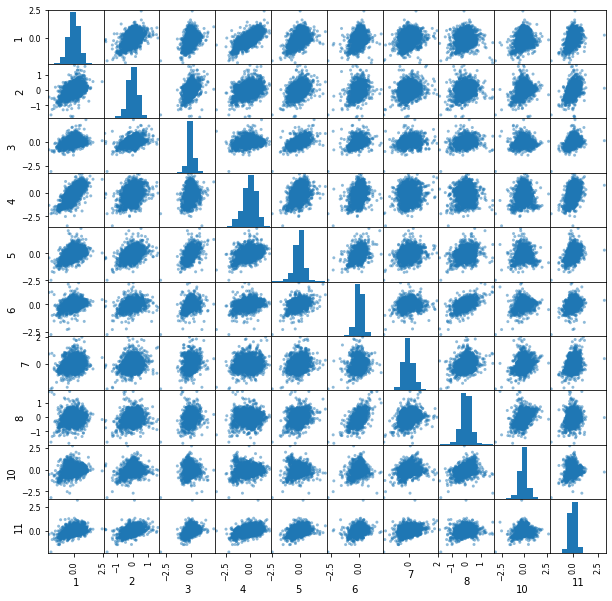

In [5]:
pd.plotting.scatter_matrix(genes.iloc[:,:10], figsize=(10,10));

# Figure 1. Plot of the first 11 columns of the dataframe in a scatter frame. We don't see much of any correlation in any of the properties.

(array([  7.,  29., 139., 501., 972., 716., 215.,  21.,   1.,   1.]),
 array([-2.20521861, -1.74433684, -1.28345506, -0.82257329, -0.36169152,
         0.09919025,  0.56007202,  1.02095379,  1.48183557,  1.94271734,
         2.40359911]),
 <a list of 10 Patch objects>)

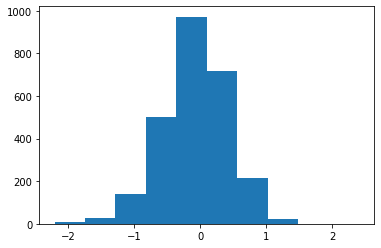

In [6]:
#plt.hist(genes.iloc(0)[0])
#plt.hist(genes.iloc(1)[0])
plt.hist(genes.iloc(1)[0])

# Figure 2. Histogram plot of one of the properties of the dataframe. We see a quasi-normal distribution around 0.

# 2 preprocess the data
2.1 whiten the data (scale it) with https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.scale.html

In [10]:
genes.mean(0)

1    -0.074219
2    -0.004992
3     0.005083
4    -0.079159
5    -0.042852
        ...   
83   -0.064188
84   -0.027919
85    0.007936
86   -0.114165
87   -0.010700
Length: 74, dtype: float64

In [11]:
scaledgenes = genes.copy()

In [12]:
scaledgenes

,1,2,3,4,5,6,7,8,10,11,...,76,77,78,79,81,83,84,85,86,87
0,-0.146342,-0.520637,0.175828,-0.323736,0.172691,0.025156,0.024812,0.172268,0.207188,0.026710,...,0.240705,-0.347746,-0.001797,-0.260594,0.105968,0.110885,-0.006975,0.550118,0.118934,0.327248
1,-0.465767,0.155823,0.226344,-0.547542,0.041096,0.137012,0.102497,-0.034277,0.500871,0.005533,...,0.371435,-0.447105,-0.134904,-0.250699,0.164698,-0.035022,0.250384,0.463746,-0.514230,0.200956
2,-0.088964,-0.208241,-0.151039,-0.288229,-0.425568,0.121006,-0.097883,-0.007597,0.329636,-0.222495,...,-0.014990,-0.458297,-0.050852,-0.168500,0.078716,-0.032231,-0.116947,-0.199880,-0.415793,-0.032004
3,-0.327696,-1.714948,0.068710,-0.168257,-0.471577,0.279013,-0.060734,-0.222574,0.658097,0.129876,...,0.153765,-0.140409,-0.119515,-0.289881,0.944493,-0.142710,-1.119866,-0.215536,0.345946,0.056442
4,-0.092327,-0.660456,0.075948,-0.646501,-0.046137,-0.010305,0.368476,-0.043832,-0.321060,0.116657,...,-0.033032,0.394082,0.173515,-0.194819,0.149131,-0.097285,-0.288192,-0.491920,-0.722120,0.055477
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2597,-0.333845,0.272029,-0.170722,0.038204,-0.097601,-0.592688,0.338378,-0.152175,0.302457,0.858478,...,-0.559128,0.236490,0.171963,0.124660,1.121866,-0.486518,-0.642105,-0.423110,-0.269496,0.510805
2598,-0.387013,-0.351933,0.363170,-0.532783,-0.405961,-0.350308,0.607677,-0.033040,0.388872,-0.238816,...,0.013212,0.122758,0.260209,0.014410,0.155995,-0.184897,0.073087,-0.095532,-0.348209,0.390796
2599,-0.167853,-0.316385,0.087252,-0.117309,-0.871179,-0.468648,0.068771,-0.143372,2.719371,-0.327453,...,2.107459,-0.798081,-0.395218,-0.850703,-0.268263,-0.573838,2.586922,-0.532048,-0.416461,0.340277
2600,-0.793226,-0.316129,-0.330165,-1.328636,-0.776035,-0.114225,0.255864,-0.005224,0.380932,-0.108821,...,-0.403937,-0.203626,0.127042,-0.407454,0.075773,-0.581201,-0.471235,-0.151244,-0.742843,0.051671


In [13]:
for i in range(genes.shape[1]):
    scaledgenes.iloc[:,i] = skl.preprocessing.scale(genes.iloc[:,i])

TypeError: iteration over a 0-d array

In [14]:
scaledgenes = skl.preprocessing.scale(genes,axis=0 ,with_mean=True, with_std=True, copy=True)



In [11]:
genes.mean(0)

1    -0.074219
2    -0.004992
3     0.005083
4    -0.079159
5    -0.042852
        ...   
83   -0.064188
84   -0.027919
85    0.007936
86   -0.114165
87   -0.010700
Length: 74, dtype: float64

In [15]:
scaledgenes.mean(0).round(2), scaledgenes.std(0)

(array([ 0., -0.,  0.,  0., -0.,  0.,  0., -0., -0.,  0.,  0., -0., -0.,
         0.,  0.,  0., -0., -0., -0.,  0.,  0., -0., -0., -0., -0., -0.,
         0., -0.,  0., -0., -0.,  0., -0., -0., -0., -0.,  0., -0., -0.,
         0., -0.,  0., -0.,  0.,  0., -0.,  0.,  0., -0.,  0.,  0., -0.,
         0.,  0.,  0.,  0., -0.,  0., -0.,  0.,  0.,  0., -0.,  0.,  0.,
        -0.,  0., -0., -0., -0., -0., -0., -0.,  0.]),
 array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1.]))

In [ ]:
scaledgenes.describe()

In [14]:
scaledgenes.head()

,1,2,3,4,5,6,7,8,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,33,34,35,36,37,38,39,40,41,42,43,44,45,46,48,49,50,51,52,55,56,57,58,60,61,64,65,66,68,69,72,73,74,75,76,77,78,79,81,83,84,85,86,87
0,-0.146019,-1.488856,0.514638,-0.353014,0.502572,0.029563,0.222502,0.604333,0.647998,0.075182,1.136687,0.907956,-0.127309,0.367495,-0.660243,0.534738,-0.276161,0.034742,-0.980446,-0.197406,0.609548,1.494984,0.115342,-0.097776,0.834808,1.425107,1.571905,-0.054503,0.299091,0.348216,1.390682,0.284985,0.501318,0.856694,-0.853848,0.161556,0.950363,-0.353100,-0.008300,-0.099195,1.091593,0.541688,-0.251869,0.967078,0.549274,0.234840,2.707725,-0.148490,0.059847,0.877376,0.023328,0.275269,0.358016,-0.277437,-0.337881,-0.092524,0.956724,0.783125,0.484408,-0.576192,0.126103,0.037952,0.444157,-0.211445,0.576660,-0.776721,-0.001318,-0.672957,0.202170,0.440209,0.045815,1.098020,0.436797,1.006906
1,-0.792728,0.464332,0.666898,-0.676048,0.195739,0.359141,0.427133,0.016276,1.292408,0.013869,1.202594,1.095210,0.055175,1.621696,-0.827387,0.027786,-0.505117,-0.289729,-1.158889,0.309853,-0.070339,1.428788,0.544404,-0.201160,1.240637,1.555996,2.044202,-0.508714,0.695053,-0.286004,0.170844,0.370791,0.487009,0.737470,-0.161089,0.446022,1.310643,-0.344948,0.516954,0.200795,1.657301,-0.017265,0.381959,1.143808,1.090641,0.120314,1.881579,-0.815878,0.153995,0.433791,-0.615950,0.081879,-0.234432,-1.120606,-0.312187,-0.542851,0.002609,1.110759,0.298254,-0.722362,0.043553,0.318469,-0.242917,-0.819484,0.846758,-1.021731,-0.420254,-0.644995,0.350828,0.073335,0.608766,0.923101,-0.749670,0.630622
2,-0.029854,-0.586855,-0.470565,-0.301764,-0.892364,0.311979,-0.100687,0.092237,0.916678,-0.646321,0.398565,0.209992,-0.259801,0.305572,-0.394290,-0.043692,-1.747101,-0.182220,-1.954691,-1.065694,-0.498056,0.655872,0.497126,-0.348993,-0.032556,0.983376,0.692545,0.268341,1.218127,-0.958493,-0.263409,-1.167418,0.474370,-0.031375,-1.650354,-1.340592,0.010389,-0.007276,-0.945628,-0.449924,0.179561,0.437077,0.774829,-0.135723,0.812693,-0.318086,1.081257,-0.815935,0.472055,0.667890,0.012390,-0.314736,0.303127,-0.074875,-0.016122,0.099233,0.208290,1.111159,0.205389,-1.414642,0.343176,-0.418678,-0.480002,0.389655,0.048375,-1.049329,-0.155712,-0.412715,0.133189,0.080352,-0.194740,-0.420867,-0.565212,-0.063473
3,-0.513189,-4.937272,0.191776,-0.128601,-0.999641,0.777537,-0.002835,-0.519828,1.637398,0.373869,1.581952,-0.210795,-0.266839,0.206770,-0.590421,-1.084528,-0.510219,0.852890,-0.642572,-0.144977,1.484118,0.590947,-0.848305,0.273840,0.316052,1.173312,0.770137,1.133725,0.310780,0.191313,0.250755,-0.376692,-0.929355,1.041450,-0.056358,-0.780719,1.613721,0.709560,0.717453,-0.226552,-0.092706,0.268279,-0.108837,0.489395,0.889698,2.291933,1.064483,0.337610,1.054762,0.053428,0.800454,0.168110,1.550840,0.715554,0.490909,-0.566964,0.485855,0.172965,0.319175,-0.046334,0.313694,0.235179,0.696623,-0.700702,0.397035,-0.265448,-0.371819,-0.755718,2.324671,-0.197438,-2.388543,-0.452573,0.862189,0.200050
4,-0.036661,-1.892565,0.213591,-0.818882,-0.007659,-0.074920,1.127750,-0.010928,-0.511103,0.335597,1.069383,0.665961,-0.079383,1.617300,-0.177465,-1.240288,-1.242240,0.156628,-0.245946,0.562178,0.526957,0.502980,0.161776,0.052103,0.468239,0.787042,1.167348,-0.225869,0.657280,-0.569612,1.601774,0.044756,0.101760,-1.378444,-0.602369,-0.207398,1.942259,-0.873132,0.878144,0.091284,0.975895,0.076618,1.044569,-0.257918,1.727517,0.998650,1.071057,-0.609384,0.283784,-0.462979,-0.427668,2.338521,0.045657,-0.703241,-0.081914,0.678818,0.224309,1.132434,1.636439,-1.854763,-0.679603,0.278083,2.058854,-1.064301,0.011097,1.052555,0.550454,-0.487088,0.311425,-0.083219,-0.569324,-1.012305,-1.139229,0.197174


2.1 use TSNE to make a projection of the data on an optimal 2D plane using https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html

In [17]:
data = np.asarray(scaledgenes)
data

array([[-0.14601929, -1.48885627,  0.51463842, ...,  1.09802038,
         0.43679723,  1.00690557],
       [-0.79272802,  0.46433166,  0.66689818, ...,  0.92310118,
        -0.7496697 ,  0.6306221 ],
       [-0.02985374, -0.58685532, -0.47056478, ..., -0.42086741,
        -0.56521196, -0.06347335],
       ...,
       [-0.18957236, -0.89910719,  0.24766294, ..., -1.09357127,
        -0.56646353,  1.04572608],
       [-1.45570084, -0.89836852, -1.01046701, ..., -0.32237148,
        -1.17806261,  0.18583484],
       [-0.12657512, -1.35418784, -0.21420423, ..., -0.65163444,
        -0.66869512, -0.03931063]])

In [18]:
twodproj = skl.manifold.TSNE(n_components=2, random_state=100).fit_transform(scaledgenes)

In [19]:
twodproj.shape

(2602, 2)

2.3 plot the TSNE projection


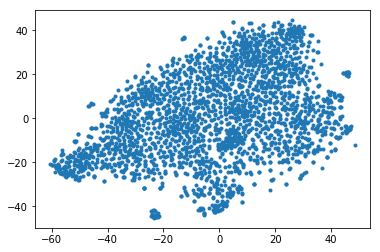

In [20]:
pl.plot(twodproj[:,0],twodproj[:,1], '.');

# Figure 3. TSNE projection of our 74 dimensional parameter space onto 2D. 
Some interesting groupings, one at the top left of the plot, and potentially one at the bottome middle.

2.4 calculate a function that measures the intracluster variance (i did it in class)

In [21]:
def distance(x, center):
  return np.power((np.abs((x - center))**(len(x))).sum(axis=1),1./len(x))


def calICVar(X, labels, model):
  n_clusters = np.unique(labels).shape[0]
  print(n_clusters)
  icv = np.zeros(n_clusters)
  for i in range(n_clusters):
    icv[i] = ((distance(model.cluster_centers_[i], X[labels==i])**2).sum() / ((labels==i).sum() - 1.)).sum()
  #print(icv.sum()/n_clusters)
  return icv.sum()

# 3 K-Means clustering
3.1 cluster the data with K-Means using 1 to 10 clusters. Calculate and plot the intracluster variance as a function of number of clusters and look for an "elbow" in the value of the intracluster variance. What is the optimal number of clusters? discuss

In [22]:
cluster.KMeans()

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [23]:
kList = [i+1 for i in range(10)]
icVar = np.zeros(len(kList))

In [24]:
for i in range(len(kList)):
  kmeans_scaledgenes = skl.cluster.KMeans(n_clusters=kList[i], random_state=555).fit(scaledgenes)
  icVar[i] = calICVar(scaledgenes, kmeans_scaledgenes.labels_, kmeans_scaledgenes)

1
2
3
4
5
6
7
8
9
10


In [25]:
icVar1 = [icVar[i-1]/(i) for i in kList]

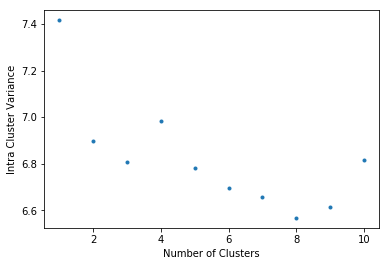

In [26]:
pl.plot(kList, icVar1, '.');
pl.xlabel("Number of Clusters")
pl.ylabel("Intra Cluster Variance");


# Figure 4. Elbow plot of the intracluster variance for k = (1,10).
We can see a bend in the plot at two clusters, k=2, suggesting 2 clusters is the most effective. The increase in intra cluster variance at k = 4 and k = 9 is concerning.

3.2 plot the cluster on the 2D TSNE projection colorcoded by clusters

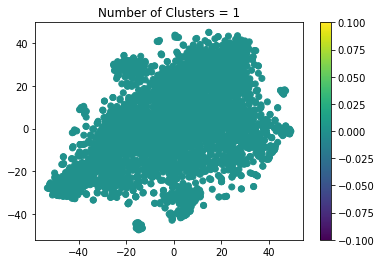

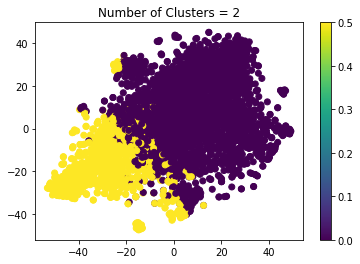

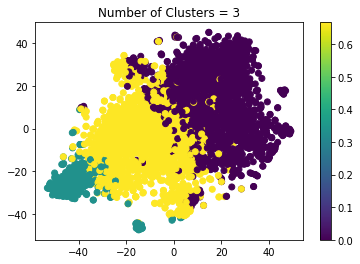

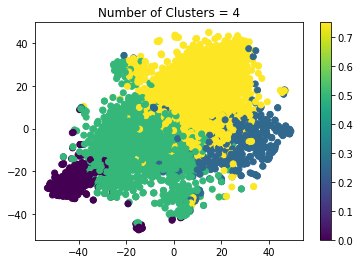

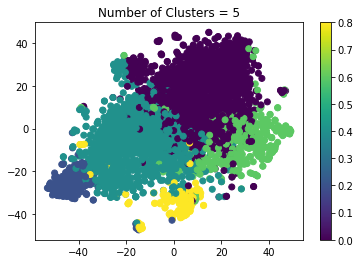

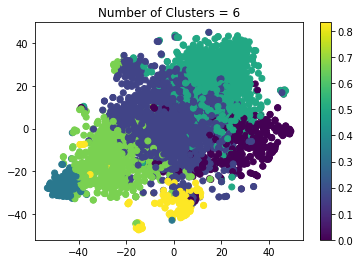

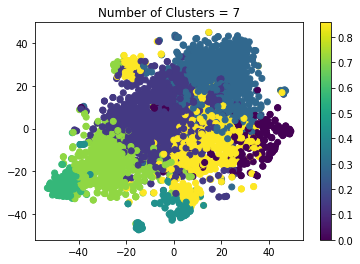

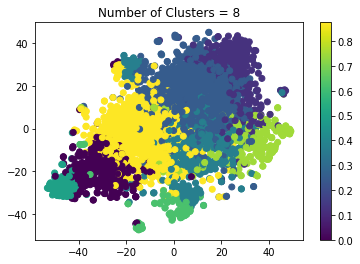

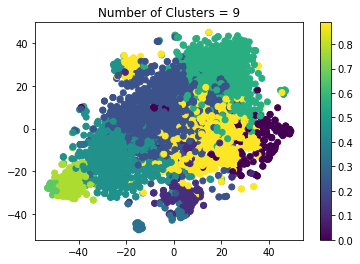

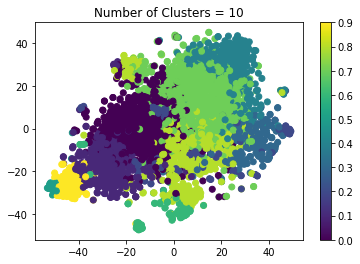

In [25]:
for i in kList:
  geneClustersKM = cluster.KMeans(n_clusters=i).fit(scaledgenes)
  pl.scatter(twodproj[:,0], twodproj[:,1], c=geneClustersKM.labels_/ geneClustersKM.n_clusters)
  pl.colorbar();
  pl.title("Number of Clusters = " + str(i))
  pl.show()

# Figure 5. Plots of the 2D TSNE projection with the clusters color coded onto the points. 


ideally you should be able to isolate the little islands, like the one on the left "at 7 hour". Try to set the starting guess in a way that may facilitate this

# Choose to use DBSCAN or hierarchical clustering (EC also to the other method)

# 4a DBSCAN
4a.1 calculate and plot the distance matrix if you have not yet. Discuss: is there structure?

In [27]:
distMat = np.zeros((scaledgenes.shape[1], scaledgenes.shape[1]))

In [27]:
for i in range(scaledgenes.shape[1]):
  for j in range(scaledgenes.shape[1]):
    distMat[i,j] = distance(scaledgenes[j:j+1].values, scaledgenes[i:i+1].values)

<Figure size 2160x2160 with 0 Axes>

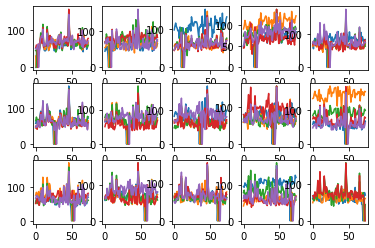

In [28]:
pl.figure(figsize=(30,30));
fig, axs = pl.subplots(3,5);
axs[0][0].plot(distMat[:,0:5]);
axs[0][1].plot(distMat[:,5:10]);
axs[0][2].plot(distMat[:,10:15]);
axs[0][3].plot(distMat[:,15:20]);
axs[0][4].plot(distMat[:,20:25]);
axs[1][0].plot(distMat[:,25:30]);
axs[1][1].plot(distMat[:,30:35]);
axs[1][2].plot(distMat[:,35:40]);
axs[1][3].plot(distMat[:,40:45]);
axs[1][4].plot(distMat[:,45:50]);
axs[2][0].plot(distMat[:,50:55]);
axs[2][1].plot(distMat[:,55:60]);
axs[2][2].plot(distMat[:,60:65]);
axs[2][3].plot(distMat[:,65:70]);
axs[2][4].plot(distMat[:,70:]);


# Figure 6. Plots of the distance matrix for the scaled genes data.

4a.2 make a histogram of the pairwise distances. You should choose a value to initialize dbscan that is just below the mean

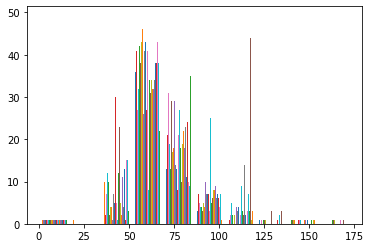

In [29]:
pl.hist(distMat);

# Figure 7. Histogram of the pair wise distances. The mean distance is 72.4 units

In [30]:
distMat.mean()

72.4007134764757

4a.3 initialize the dbscan eps value appropriately and fit a dbscan model to the data plot the 2D TSNE projection colorcoded as before. 

4a.4 How many clusters do you have, how many outliers? is that a significant number?

In [31]:
obj = cluster.DBSCAN(eps=distMat.mean()*.1, metric="euclidean")

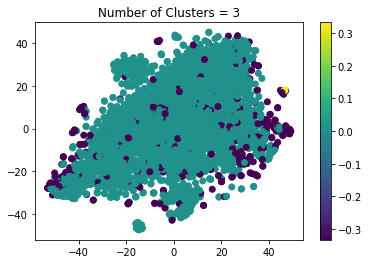

In [32]:
fit = obj.fit(scaledgenes)
unique_labels = set(fit.labels_)
pl.scatter(twodproj[:,0], twodproj[:,1], c=fit.labels_/ len(unique_labels))
pl.colorbar();
pl.title("Number of Clusters = " +str(len(unique_labels)))
pl.show()

# Figure 8. At a epsilon value of 1/10 the mean of the distances we find 3 clusters from the DBSCAN. All other values of epsilon I chose found only one cluster.

# 4b Agglomerative clustering
 4b.1 cluster the data with the ward linkage


4b.2 calculate the linkage and plot the dendrogram of the clusters  
https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.dendrogram.html
https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html


In [33]:
from scipy.cluster.hierarchy import dendrogram, linkage

4b.3 repeat with a different linkage and comment on differences

4b.4 rerun agglomerative cluatering to get the "ideal" number of clusters as decided by k-means. plot the 2D TSNE projection colorcoded as before.

# EC, 667: do the other method as well: agglomerative if you used DBSCAn, DBSCAN if you used agglomerative


---

<h1 style="color:red"> Great ! could plot distance matrix as 2D heatmap, plot histogram after flatten distMat (-2pt)</h1>
